# Linear Regression variants,KNN and Random Forest tested on Ethereum

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns

In [2]:
ethereum=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/Ethereum.xlsx',sheet_name="ethereum")
print(ethereum.tail())

           Date    Price     Open     High      Low       Vol.  Change %  \
1156 2021-03-02  1488.62  1570.00  1602.13  1457.22  1740000.0   -0.0518   
1157 2021-03-03  1571.05  1488.80  1653.04  1477.72  1170000.0    0.0554   
1158 2021-03-04  1538.61  1567.84  1623.73  1506.86  1700000.0   -0.0206   
1159 2021-03-05  1530.29  1539.73  1548.71  1443.32  1670000.0   -0.0054   
1160 2021-03-06  1649.19  1530.24  1670.01  1514.62  2070000.0    0.0777   

            MktCap  Tradecount  
1156  171484736319      966176  
1157  181069778316     1237215  
1158  177191062441     1125118  
1159  176219185802     1000913  
1160  190201808027     1188531  


# EDA ETHEREUM

<AxesSubplot:title={'center':'ETHEREUM PRICES'}, ylabel='Price'>

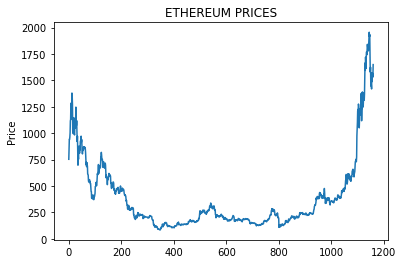

In [3]:
plt.title("ETHEREUM PRICES")
sns.lineplot(data=ethereum['Price'])

<AxesSubplot:>

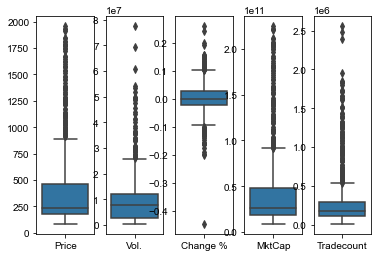

In [4]:
fig, axs = plt.subplots(ncols=5)
sns.set_style("whitegrid")
sns.boxplot(data=ethereum[['Price']],ax=axs[0])
sns.boxplot(data=ethereum[['Vol.']],ax=axs[1])
sns.boxplot(data=ethereum[['Change %']],ax=axs[2])
sns.boxplot(data=ethereum[['MktCap']],ax=axs[3])
sns.boxplot(data=ethereum[['Tradecount']],ax=axs[4])

<AxesSubplot:>

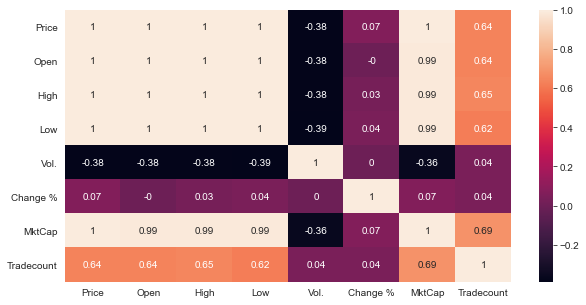

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(ethereum.corr().round(2), annot=True)

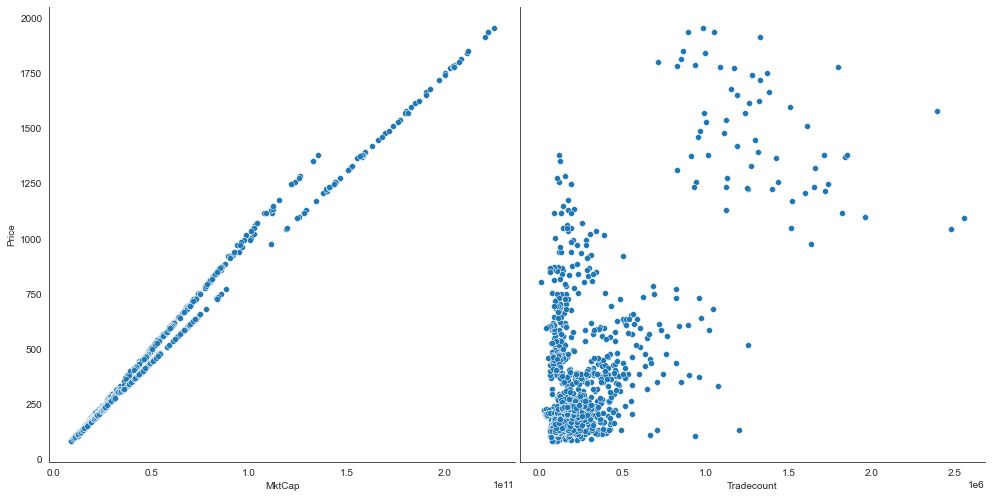

In [6]:
sns.set_style("white")
sns.pairplot(ethereum,x_vars=['MktCap','Tradecount'],y_vars='Price',height=7,kind='scatter',diag_kind=None)

In [7]:
import scipy as scipy
from scipy.stats.mstats import normaltest
print(normaltest(ethereum['Price']))

NormaltestResult(statistic=515.4957500492063, pvalue=1.152179528369068e-112)


In [8]:
from scipy.stats import boxcox

def boxcox_transformation(a):
    boxcox_res=boxcox(a)
    print(boxcox_res)
    boxcox_y=boxcox_res[0] # as it has two outputs one the ransformed array and the lambda used to transform
    return boxcox_y
    
boxcox_ethereum_price=boxcox_transformation(ethereum.Price)

print(normaltest(boxcox_ethereum_price))

(array([1.89540626, 1.89978053, 1.90267152, ..., 1.91592118, 1.91579211,
       1.91754216]), -0.5095350911239437)
NormaltestResult(statistic=104.11940132416223, pvalue=2.459004213617856e-23)


# LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

x=ethereum[['MktCap','Tradecount']]
y=boxcox_ethereum_price

lr=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nMean Negative square from CV=5")
print(mean_mse)

Mean Absolute Error: 0.015919111820660786
Mean Squared Error: 0.0003922055938203471
Root Mean Squared Error: 0.019804181220650023
INTERCEPT 1.8164903159920653 

COEFS [ 8.99758773e-13 -2.39744022e-08] 

R_SQUARED 0.7004718736163691 


Mean Negative square from CV=5
-0.0010456548145684123


          0
344  601.68
345  408.52
346  408.85
347  774.50
348  162.80
              0
344  395.541091
345  278.705486
346  282.719102
347  459.765927
348  194.968724


Text(0.5, 1.0, 'Linear Regression')

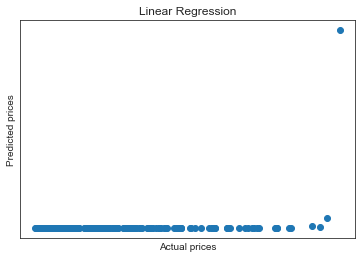

In [10]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.5095350911239437)
price_pred=inv_boxcox(y_pred,-0.5095350911239437)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Linear Regression")

# HUBBER REGRESSION

In [11]:
#HuberRegressor model;Huber loss is a loss function used in robust regression that is less sensitive to outliers 
#in data than the squared error loss. The Hubber Regressor provided by scikit-learn optimizes the squared loss and
#absolute loss for the samples based on epsilon, where epsilon is a parameter to control the number of samples 
#which should be treated as outliers.

from sklearn.linear_model import HuberRegressor

x=ethereum[['MktCap','Tradecount']]
y=boxcox_ethereum_price

hr=HuberRegressor(alpha=0.001, epsilon=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=hr.fit(x_train,y_train)
y_pred = hr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 1.0670423646757115
Mean Squared Error: 1.652926935191472
Root Mean Squared Error: 1.2856620610376088
INTERCEPT 4.1951198914739926e-21 

COEFS [3.28105405e-11 4.54739200e-16] 

R_SQUARED -1311.744531665738 


Mean Negative square from CV=5
-0.0010456548145684127


        0
0  152.70
1  186.63
2  184.81
3  456.64
4  205.68
           0
0   1.895634
1   2.247106
2   2.215873
3  18.195388
4   2.336294


Text(0.5, 1.0, 'Hubber Regression')

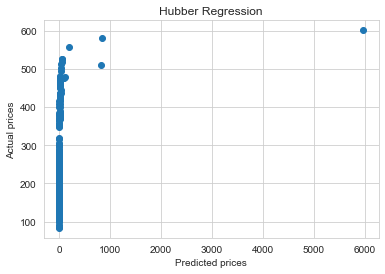

In [12]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.5095350911239437)
price_pred=inv_boxcox(y_pred,-0.5095350911239437)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.head())
print(y_pred_data.head())

plt.scatter(y_pred_data,y_test_data)
plt.xlabel("Predicted prices")
plt.ylabel("Actual prices")
plt.title("Hubber Regression")

# POLYNOMIAL REGRESSION

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x=ethereum[['MktCap','Tradecount']]
y=boxcox_ethereum_price


# TRAINING ERROR PER DEGREE
train_rmse_errors = [] #Saving root mean square for the train set
# TEST ERROR PER DEGREE
test_rmse_errors = [] #Saving root mean square for the test set

for d in range(1,10): #Choose any range you want, the larger the range you test, the more degrees you take into account.
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False) #d is from 1 to 10, we don't want array of 1 as features.
    poly_features = polynomial_converter.fit_transform(x)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred)) #Notice we have y train here
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred)) #Notice we have y test here

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [12]:
train_rmse_errors

[0.020041935210179565,
 0.01069475842356544,
 0.01940922265648702,
 0.025588950112290426,
 0.028999720122422724,
 0.03074891074199165,
 0.03172105726388688,
 0.032334877053004904,
 0.03276462382490274]

In [13]:
test_rmse_errors

[0.019804181220650023,
 0.01099412528745748,
 0.019756749525453716,
 0.02597578278814372,
 0.02998272306503924,
 0.032336728092796925,
 0.03368535367004734,
 0.034503896537767156,
 0.035042314107877774]

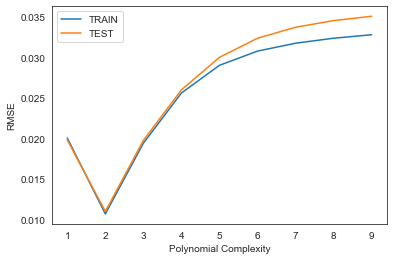

In [14]:
plt.plot(range(1,10),train_rmse_errors[:9],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:9],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

#

In [15]:
x=ethereum[['MktCap','Tradecount']]

polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(x)
y=boxcox_ethereum_price
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3,  random_state=101)
pr = LinearRegression(fit_intercept=True)
model=pr.fit(x_train,y_train)
y_pred = pr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(poly_features,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.008777530937546296
Mean Squared Error: 0.00012087671315006255
Root Mean Squared Error: 0.01099439462408288
INTERCEPT 1.7826445590897293 

COEFS [ 0.00000000e+00  2.18216460e-12  4.89679842e-18 -8.07349280e-24
  1.39605122e-19 -1.40082385e-14] 

R_SQUARED 0.9126334119942974 


Mean Negative square from CV=5
-0.0010456548145684123


          0
344  601.68
345  408.52
346  408.85
347  774.50
348  162.80
               0
344   761.456381
345   377.707819
346   325.934823
347  1370.347895
348   169.508249


Text(0.5, 1.0, 'Polynomial Regression d=2')

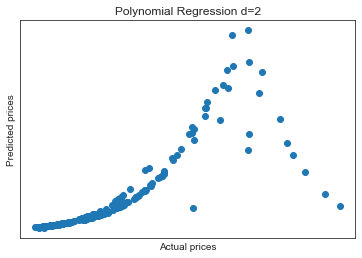

In [16]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.5095350911239437)
price_pred=inv_boxcox(y_pred,-0.5095350911239437)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Polynomial Regression d=2")

# ELASTICNET

In [17]:
from sklearn.linear_model import ElasticNetCV

x=ethereum[['MktCap','Tradecount']]
y=boxcox_ethereum_price

lr= ElasticNetCV(l1_ratio=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.017025045899630598
Mean Squared Error: 0.0004312251702607521
Root Mean Squared Error: 0.020765961818821493
INTERCEPT 1.815635706887334 

COEFS [ 7.59484796e-13 -0.00000000e+00] 

R_SQUARED 0.6773715432373975 


Mean Negative square from CV=5
-0.001025175428559022


          0
344  601.68
345  408.52
346  408.85
347  774.50
348  162.80
              0
344  381.455323
345  277.157278
346  260.113795
347  536.213814
348  195.721430


Text(0.5, 1.0, 'ElasticNet Regression')

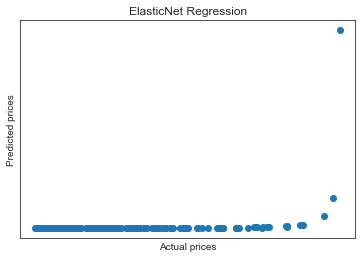

In [18]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.5095350911239437)
price_pred=inv_boxcox(y_pred,-0.5095350911239437)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("ElasticNet Regression")

# KNN

In [19]:
# Grid Search for Parameter Tuning 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV


x=ethereum[['MktCap','Tradecount']]
y=boxcox_ethereum_price


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.001761174493276064
Mean Squared Error: 4.803191151941933e-06
Root Mean Squared Error: 0.0021916183864765172
R_SQUARED 0.9970258521042372 


Mean Negative square from CV=5
-2.6385064710223486e-05


          0
344  601.68
345  408.52
346  408.85
347  774.50
348  162.80
              0
344  670.202276
345  435.068987
346  388.052785
347  893.582376
348  166.036131


Text(0.5, 1.0, 'KNN Regression')

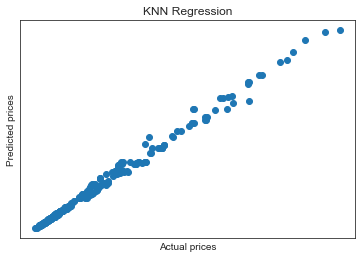

In [20]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.5095350911239437)
price_pred=inv_boxcox(y_pred,-0.5095350911239437)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("KNN Regression")

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

x=ethereum[['MktCap','Tradecount']]
y=boxcox_ethereum_price

# Model for best neighbour
model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
rf = model.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.0010614176537729406
Mean Squared Error: 2.402987574614346e-06
Root Mean Squared Error: 0.0015501572741545761
R_SQUARED 0.9992755343532217 


Mean Negative square from CV=5
-2.6385064710223486e-05


          0
344  601.68
345  408.52
346  408.85
347  774.50
348  162.80
              0
344  646.244534
345  413.433465
346  403.650412
347  829.152340
348  165.294805


Text(0.5, 1.0, 'RandomForest Regression')

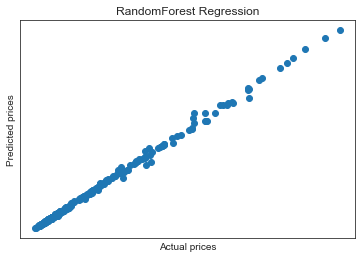

In [22]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.5095350911239437)
price_pred=inv_boxcox(y_pred,-0.5095350911239437)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("RandomForest Regression")